In [35]:
# keep this function handy for all network visualizations in all chapters

import networkx as nx
import numpy as np
from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
import pandas as pd
from tqdm import tqdm
from newspaper import Article
import time
import spacy
import scipy.sparse as sp


def draw_graph(G, show_names=False, node_size=0.2, font_size=10, edge_width=0.5):
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be a NetworkX Graph object.")

    adjacency = nx.to_numpy_array(G, nodelist=None, dtype=None, order=None, multigraph_weight=sum, weight='weight', nonedge=0.0)
    adjacency = sp.csr_matrix(adjacency)
    #adjacency = nx.to_numpy_array(G, weight='weight', multigraph_weight=sum)
    names = np.array(list(G.nodes()))
    print(names)
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = names

    if show_names and 'names' not in graph:
        raise ValueError("Graph must have node names if show_names is True.")

    image = svg_graph(
        graph.adjacency,  # Remove unused pagerank scores
        edge_width=edge_width,
        display_node_weight=True,
        node_size=node_size,
        font_size=font_size,
        names=graph.names if show_names else None,
        width=1024,
        height=1024,
        margin=0,
        scale=1.0,
        node_color="lightblue",
        edge_color="black",
        filename=None,
        directed=False

    )

    return SVG(image)

# get data

In [36]:
import networkx as nx 
 
G = nx.les_miserables_graph() 

In [37]:
import pandas as pd 
 
df = nx.to_pandas_edgelist(G)[['source', 'target']] # dropping 'weight' 

G = nx.from_pandas_edgelist(df) 

In [38]:
print(G) 

Graph with 77 nodes and 254 edges


['Napoleon' 'Myriel' 'MlleBaptistine' 'MmeMagloire' 'CountessDeLo'
 'Geborand' 'Champtercier' 'Cravatte' 'Count' 'OldMan' 'Valjean' 'Labarre'
 'Marguerite' 'MmeDeR' 'Isabeau' 'Gervais' 'Fantine' 'MmeThenardier'
 'Thenardier' 'Cosette' 'Javert' 'Fauchelevent' 'Bamatabois' 'Simplice'
 'Scaufflaire' 'Woman1' 'Judge' 'Champmathieu' 'Brevet' 'Chenildieu'
 'Cochepaille' 'Woman2' 'MotherInnocent' 'Gavroche' 'Gillenormand'
 'MlleGillenormand' 'Marius' 'Enjolras' 'Bossuet' 'Gueulemer' 'Babet'
 'Claquesous' 'Montparnasse' 'Toussaint' 'Listolier' 'Tholomyes' 'Fameuil'
 'Blacheville' 'Favourite' 'Dahlia' 'Zephine' 'Perpetue' 'Eponine'
 'Anzelma' 'Magnon' 'Pontmercy' 'Boulatruelle' 'Brujon' 'LtGillenormand'
 'Gribier' 'MmePontmercy' 'Mabeuf' 'Courfeyrac' 'MmeBurgon' 'Jondrette'
 'Combeferre' 'Prouvaire' 'Feuilly' 'Bahorel' 'Joly' 'Grantaire' 'Child1'
 'Child2' 'MmeHucheloup' 'BaronessT' 'MlleVaubois' 'MotherPlutarch']


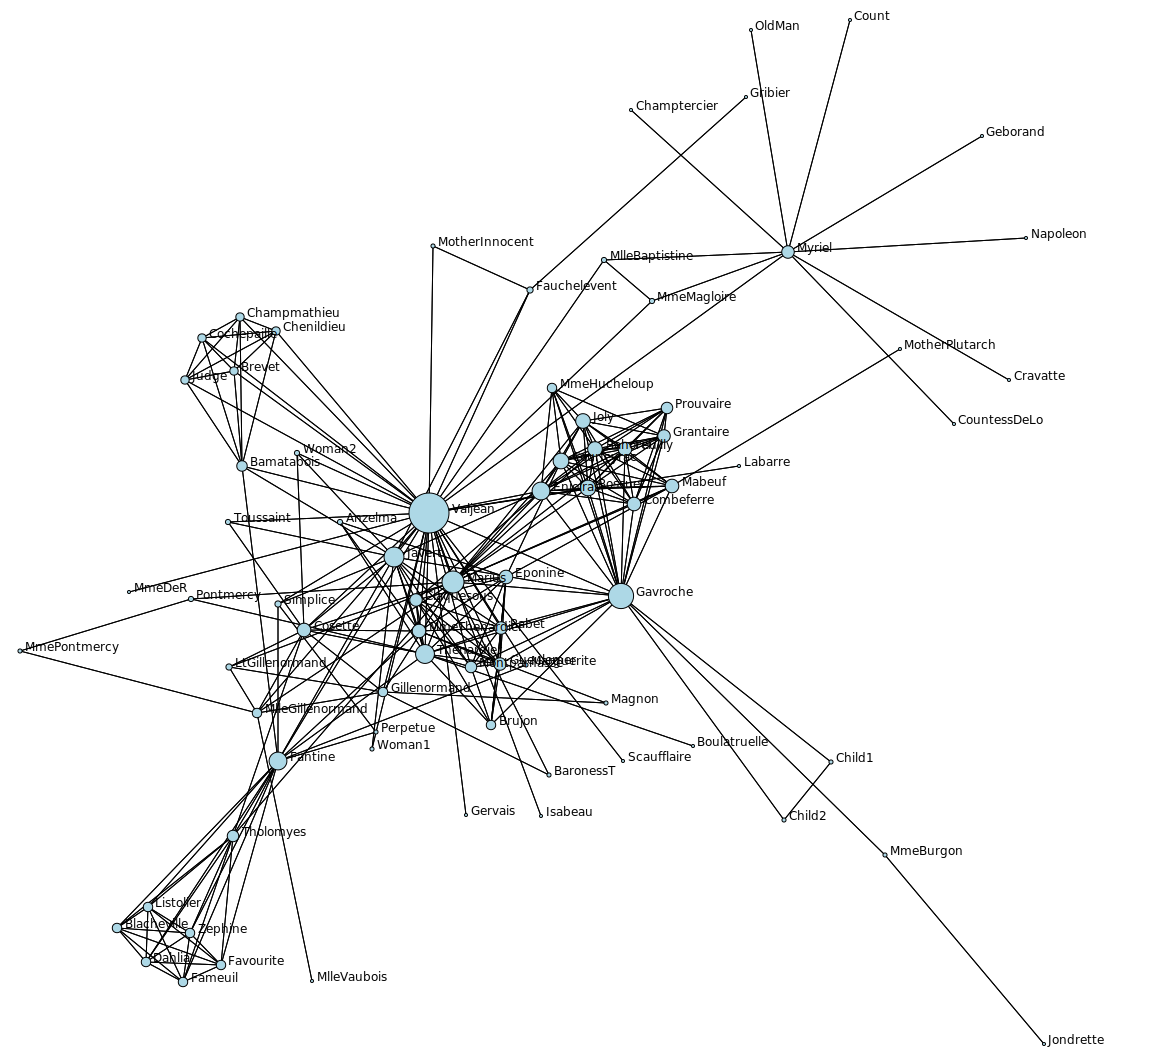

In [39]:
draw_graph(G, font_size=12, show_names=True, node_size=4, edge_width=1) 

['Myriel' 'MlleBaptistine' 'MmeMagloire' 'Valjean' 'Marguerite' 'Fantine'
 'MmeThenardier' 'Thenardier' 'Cosette' 'Javert' 'Fauchelevent'
 'Bamatabois' 'Simplice' 'Woman1' 'Judge' 'Champmathieu' 'Brevet'
 'Chenildieu' 'Cochepaille' 'Woman2' 'MotherInnocent' 'Gavroche'
 'Gillenormand' 'MlleGillenormand' 'Marius' 'Enjolras' 'Bossuet'
 'Gueulemer' 'Babet' 'Claquesous' 'Montparnasse' 'Toussaint' 'Listolier'
 'Tholomyes' 'Fameuil' 'Blacheville' 'Favourite' 'Dahlia' 'Zephine'
 'Perpetue' 'Eponine' 'Anzelma' 'Magnon' 'Pontmercy' 'Brujon'
 'LtGillenormand' 'MmePontmercy' 'Mabeuf' 'Courfeyrac' 'Combeferre'
 'Prouvaire' 'Feuilly' 'Bahorel' 'Joly' 'Grantaire' 'Child1' 'Child2'
 'MmeHucheloup' 'BaronessT']


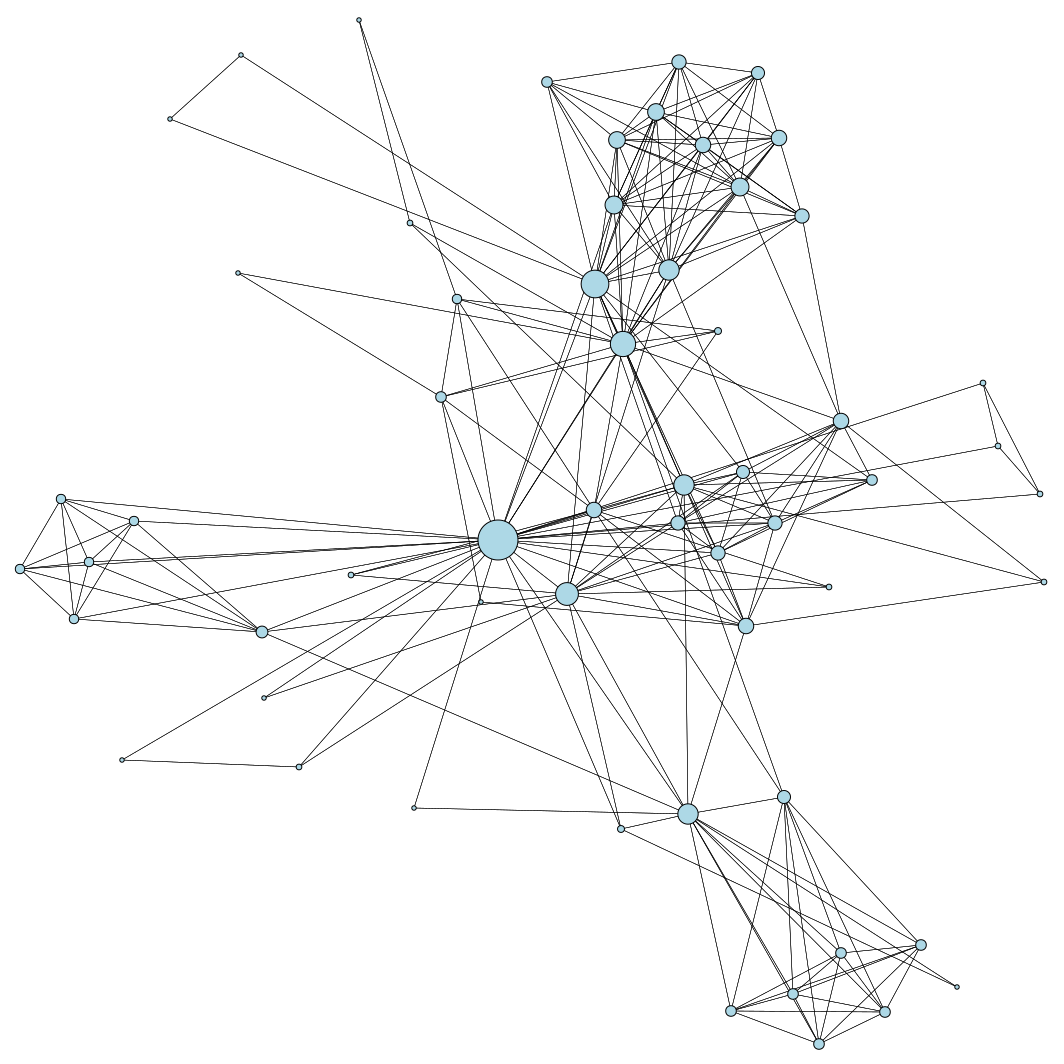

In [40]:
draw_graph(nx.k_core(G, 2), font_size=12, show_names=False, node_size=4, edge_width=0.5) 

# exploring connected components

In [41]:
G_copy = G.copy() 

G_copy.remove_nodes_from(['Valjean', 'Marius', 'Fantine', 'Cosette', 'Bamatabois']) 

['Napoleon' 'Myriel' 'MlleBaptistine' 'MmeMagloire' 'CountessDeLo'
 'Geborand' 'Champtercier' 'Cravatte' 'Count' 'OldMan' 'Labarre'
 'Marguerite' 'MmeDeR' 'Isabeau' 'Gervais' 'MmeThenardier' 'Thenardier'
 'Javert' 'Fauchelevent' 'Simplice' 'Scaufflaire' 'Woman1' 'Judge'
 'Champmathieu' 'Brevet' 'Chenildieu' 'Cochepaille' 'Woman2'
 'MotherInnocent' 'Gavroche' 'Gillenormand' 'MlleGillenormand' 'Enjolras'
 'Bossuet' 'Gueulemer' 'Babet' 'Claquesous' 'Montparnasse' 'Toussaint'
 'Listolier' 'Tholomyes' 'Fameuil' 'Blacheville' 'Favourite' 'Dahlia'
 'Zephine' 'Perpetue' 'Eponine' 'Anzelma' 'Magnon' 'Pontmercy'
 'Boulatruelle' 'Brujon' 'LtGillenormand' 'Gribier' 'MmePontmercy'
 'Mabeuf' 'Courfeyrac' 'MmeBurgon' 'Jondrette' 'Combeferre' 'Prouvaire'
 'Feuilly' 'Bahorel' 'Joly' 'Grantaire' 'Child1' 'Child2' 'MmeHucheloup'
 'BaronessT' 'MlleVaubois' 'MotherPlutarch']


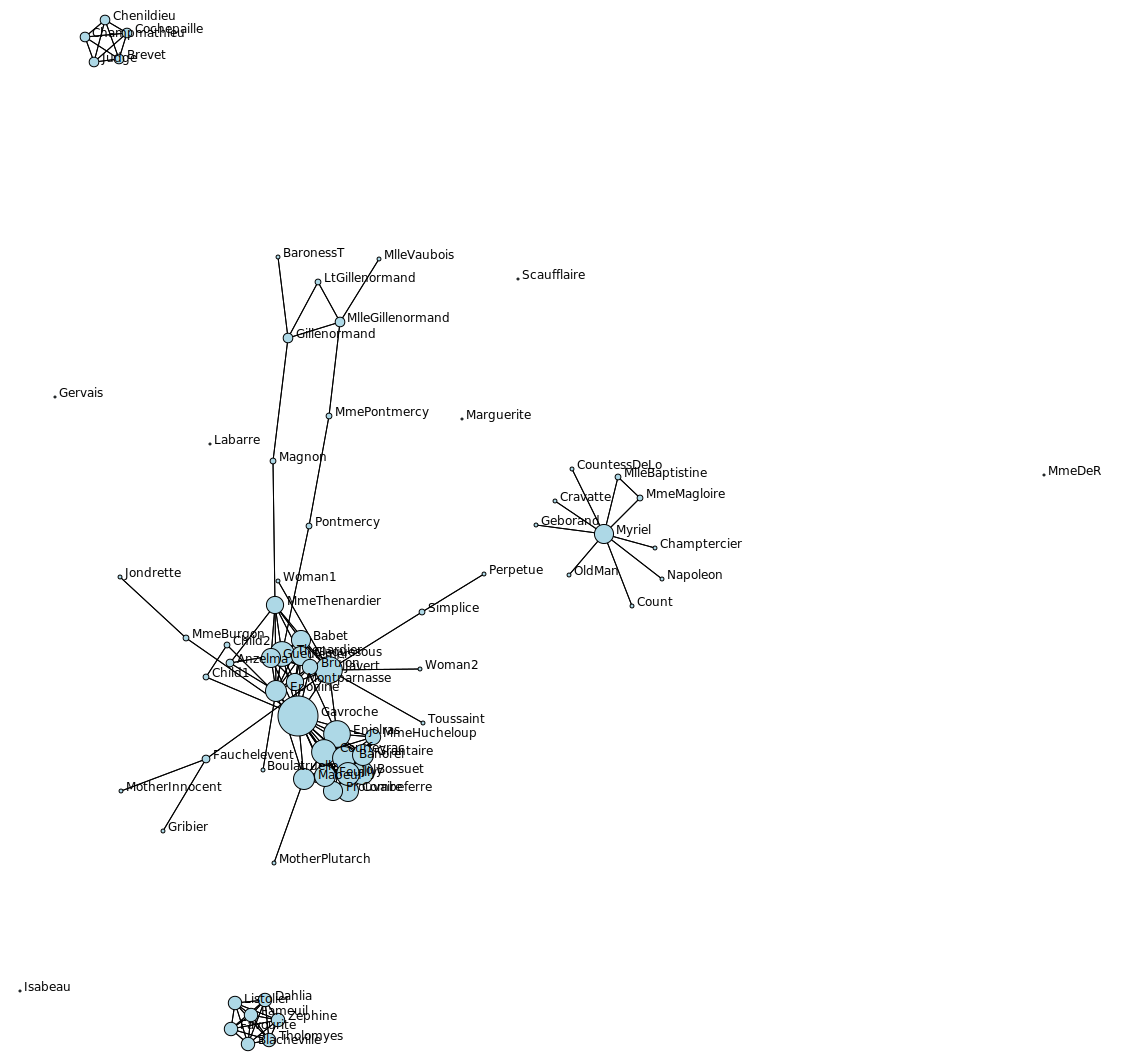

In [42]:
draw_graph(G_copy, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [43]:
components = list(nx.connected_components(G_copy)) 

len(components) 

10

In [44]:
G_copy = nx.k_core(G_copy, 1) 

components = list(nx.connected_components(G_copy)) 

len(components) 

4

['CountessDeLo' 'Geborand' 'Count' 'MlleBaptistine' 'Myriel' 'Napoleon'
 'Cravatte' 'MmeMagloire' 'OldMan' 'Champtercier']


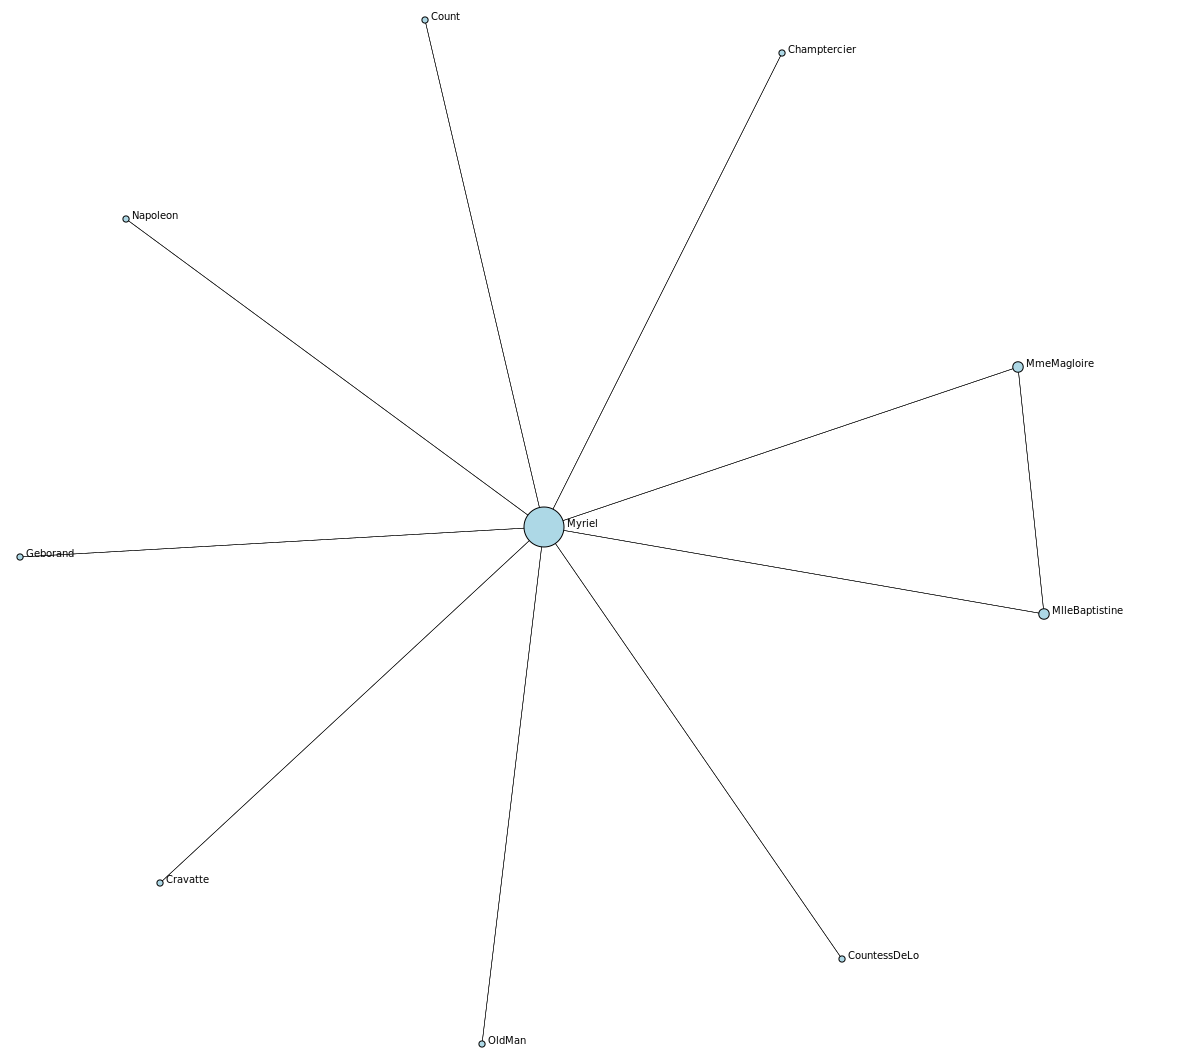

In [45]:
community = components[0] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

['MmeThenardier' 'Thenardier' 'Javert' 'Fauchelevent' 'Simplice' 'Woman1'
 'Woman2' 'MotherInnocent' 'Gavroche' 'Gillenormand' 'MlleGillenormand'
 'Enjolras' 'Bossuet' 'Gueulemer' 'Babet' 'Claquesous' 'Montparnasse'
 'Toussaint' 'Perpetue' 'Eponine' 'Anzelma' 'Magnon' 'Pontmercy'
 'Boulatruelle' 'Brujon' 'LtGillenormand' 'Gribier' 'MmePontmercy'
 'Mabeuf' 'Courfeyrac' 'MmeBurgon' 'Jondrette' 'Combeferre' 'Prouvaire'
 'Feuilly' 'Bahorel' 'Joly' 'Grantaire' 'Child1' 'Child2' 'MmeHucheloup'
 'BaronessT' 'MlleVaubois' 'MotherPlutarch']


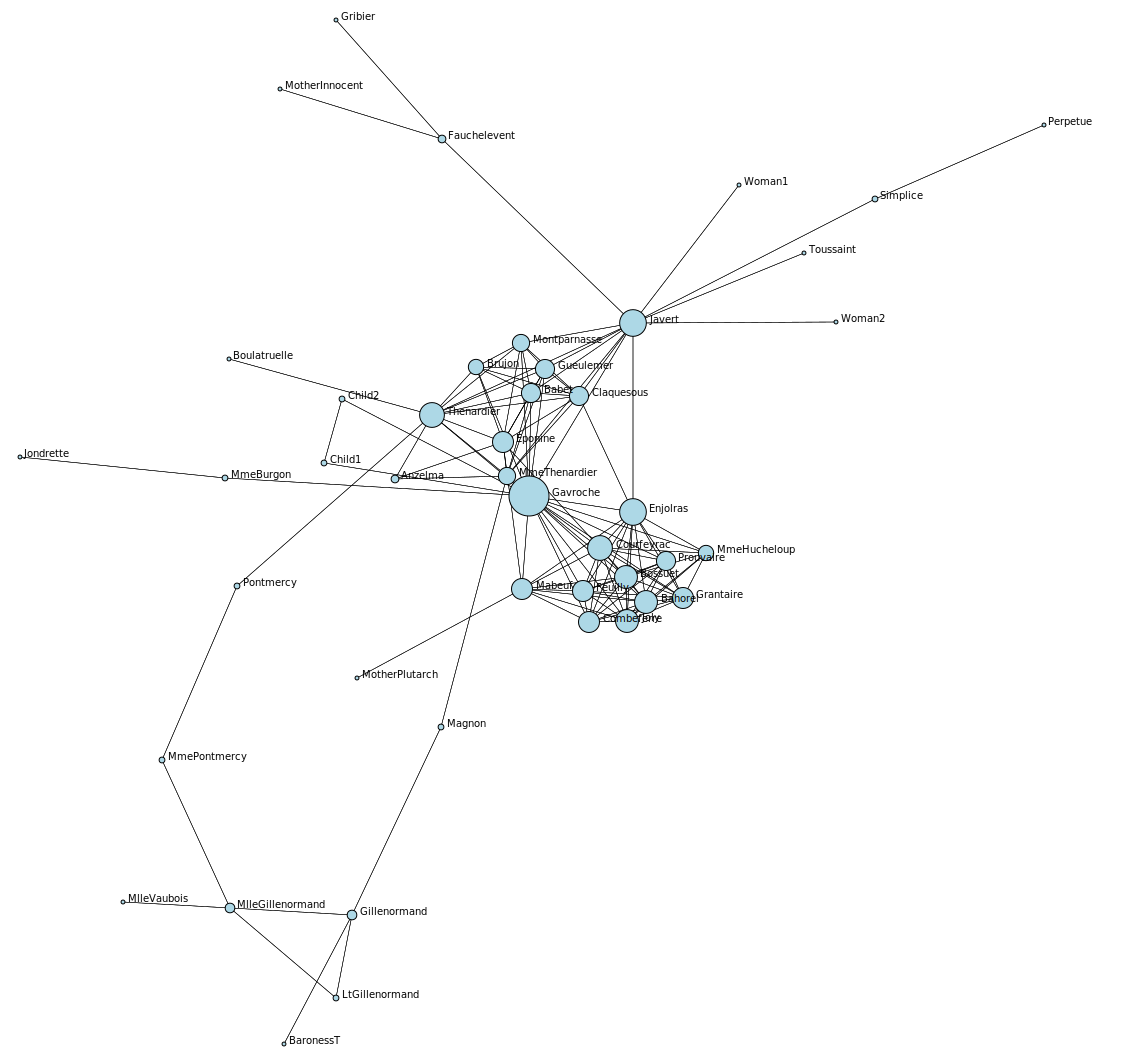

In [46]:
community = components[1] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=4) 

['Chenildieu' 'Brevet' 'Champmathieu' 'Judge' 'Cochepaille']


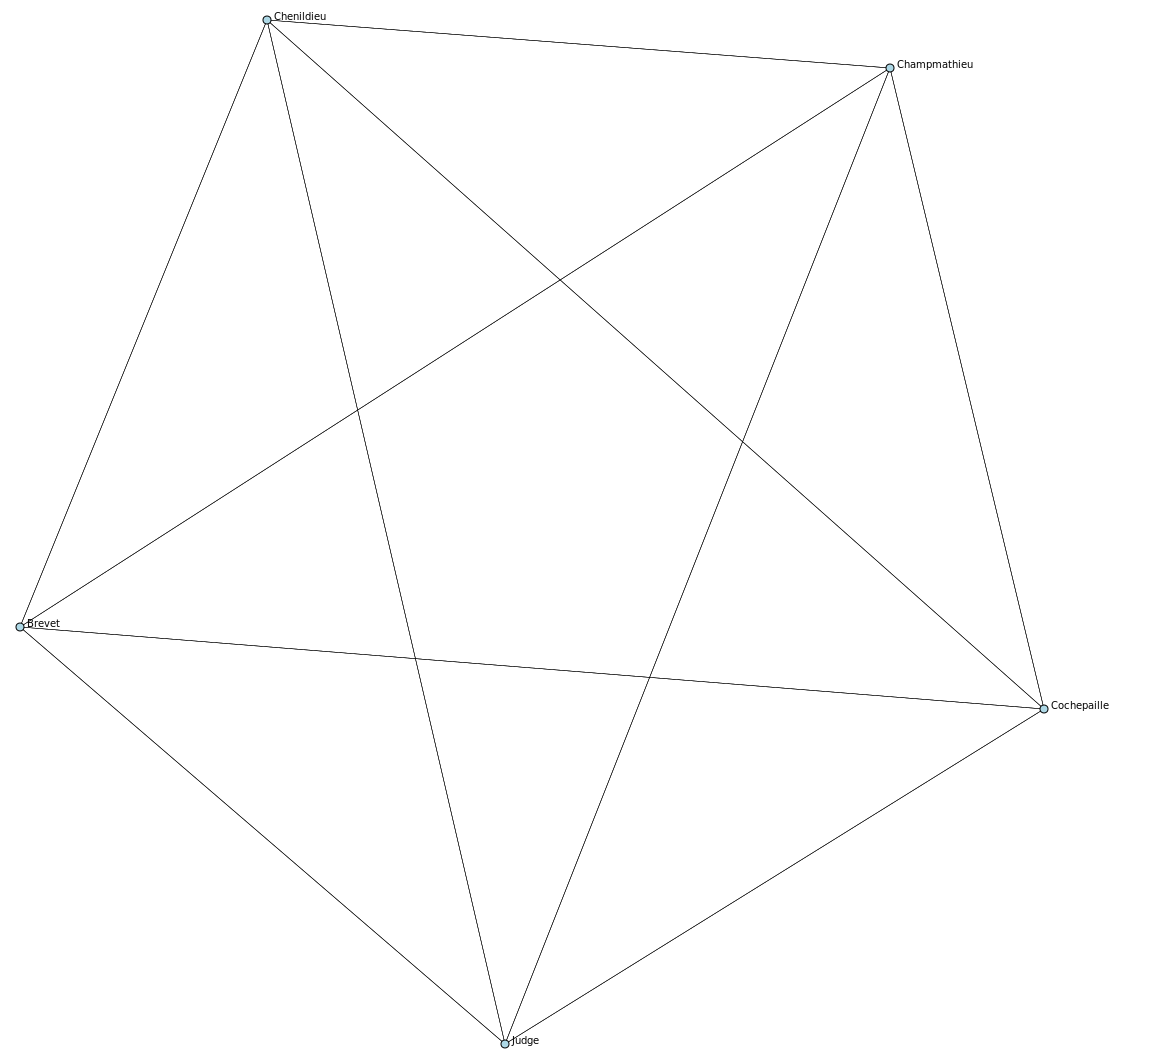

In [47]:
community = components[2] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=4) 

['Favourite' 'Blacheville' 'Zephine' 'Fameuil' 'Tholomyes' 'Listolier'
 'Dahlia']


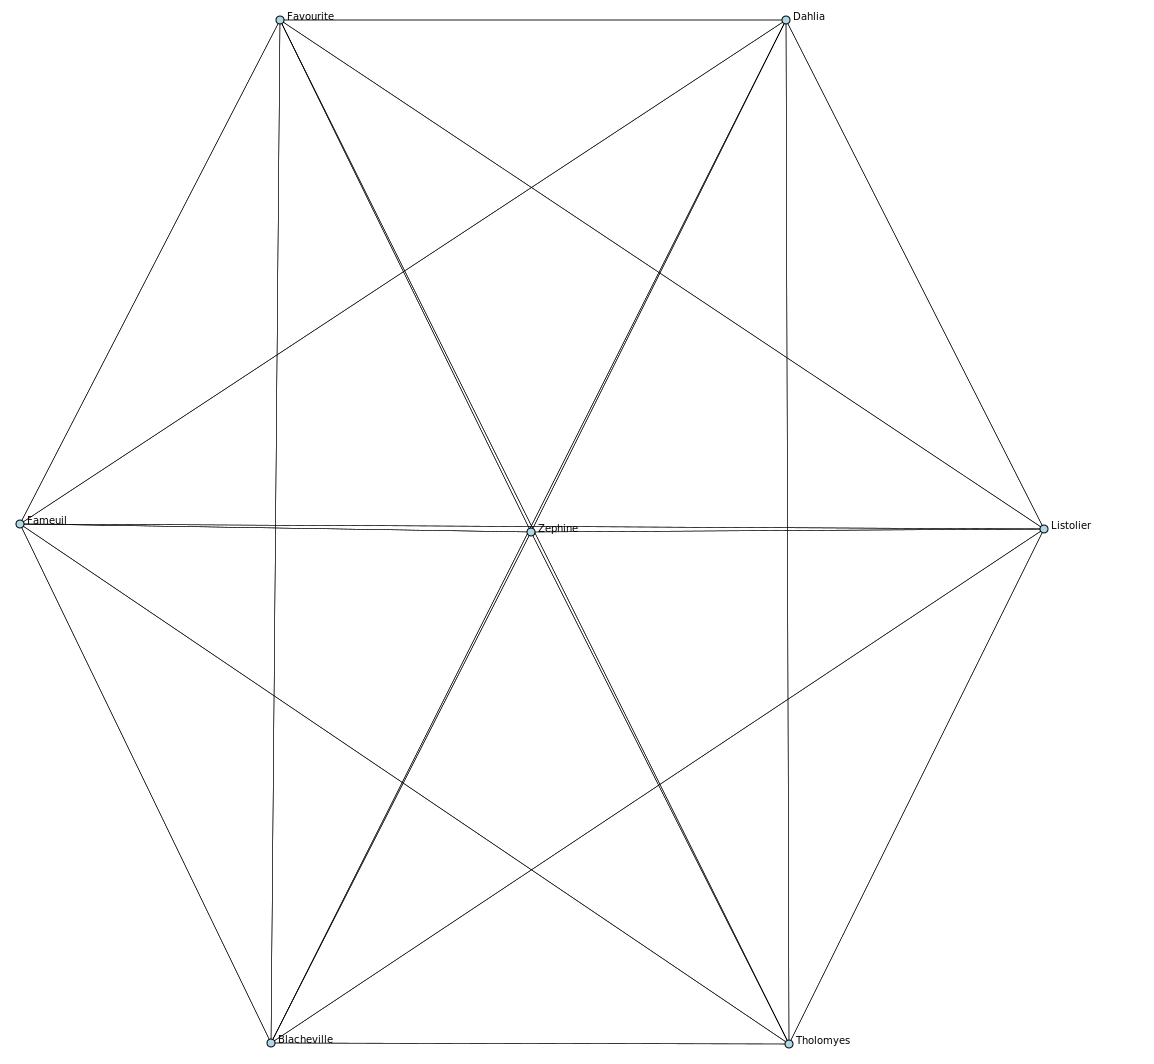

In [48]:
community = components[3] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=4) 

# Louvain Method

In [49]:
import community as community_louvain

In [50]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 
    cmap = cm.get_cmap('jet', max(partition.values()) + 1) 
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

C:\Users\amird\AppData\Local\Temp\ipykernel_10612\2878357847.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', max(partition.values()) + 1)


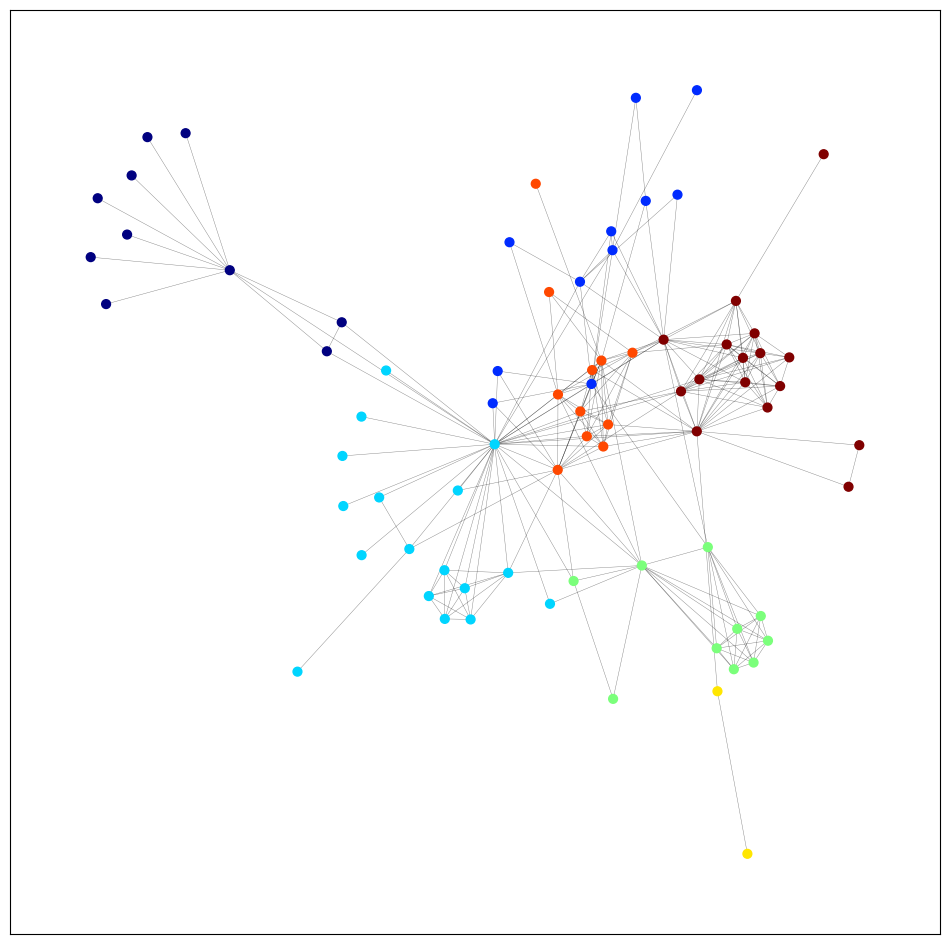

In [51]:
partition = community_louvain.best_partition(G, resolution=1) 

draw_partition(G, partition) 

In [52]:
partition

{'Napoleon': 0,
 'Myriel': 0,
 'MlleBaptistine': 0,
 'MmeMagloire': 0,
 'CountessDeLo': 0,
 'Geborand': 0,
 'Champtercier': 0,
 'Cravatte': 0,
 'Count': 0,
 'OldMan': 0,
 'Valjean': 2,
 'Labarre': 2,
 'Marguerite': 2,
 'MmeDeR': 2,
 'Isabeau': 2,
 'Gervais': 2,
 'Fantine': 3,
 'MmeThenardier': 5,
 'Thenardier': 5,
 'Cosette': 1,
 'Javert': 5,
 'Fauchelevent': 2,
 'Bamatabois': 2,
 'Simplice': 3,
 'Scaufflaire': 2,
 'Woman1': 2,
 'Judge': 2,
 'Champmathieu': 2,
 'Brevet': 2,
 'Chenildieu': 2,
 'Cochepaille': 2,
 'Woman2': 1,
 'MotherInnocent': 2,
 'Gavroche': 6,
 'Gillenormand': 1,
 'MlleGillenormand': 1,
 'Marius': 6,
 'Enjolras': 6,
 'Bossuet': 6,
 'Gueulemer': 5,
 'Babet': 5,
 'Claquesous': 5,
 'Montparnasse': 5,
 'Toussaint': 1,
 'Listolier': 3,
 'Tholomyes': 3,
 'Fameuil': 3,
 'Blacheville': 3,
 'Favourite': 3,
 'Dahlia': 3,
 'Zephine': 3,
 'Perpetue': 3,
 'Eponine': 5,
 'Anzelma': 5,
 'Magnon': 1,
 'Pontmercy': 1,
 'Boulatruelle': 5,
 'Brujon': 5,
 'LtGillenormand': 1,
 'Gribier':

In [53]:
[node for node, community in partition.items() if community == 2] 

['Valjean',
 'Labarre',
 'Marguerite',
 'MmeDeR',
 'Isabeau',
 'Gervais',
 'Fauchelevent',
 'Bamatabois',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'MotherInnocent',
 'Gribier']

# Label Propagation

In [54]:
from networkx.algorithms.community.label_propagation import label_propagation_communities 

In [55]:
communities = label_propagation_communities(G) 

In [56]:
communities = list(communities) 

communities[0] 

{'Champtercier',
 'Count',
 'CountessDeLo',
 'Cravatte',
 'Geborand',
 'Myriel',
 'Napoleon',
 'OldMan'}

['MlleBaptistine' 'MotherInnocent' 'Gervais' 'Woman1' 'Cosette' 'Labarre'
 'Valjean' 'Scaufflaire' 'Brevet' 'MmeDeR' 'Bamatabois' 'Toussaint'
 'Chenildieu' 'Judge' 'Javert' 'Champmathieu' 'Woman2' 'Gribier'
 'MmeMagloire' 'Simplice' 'Fauchelevent' 'Isabeau' 'Cochepaille']


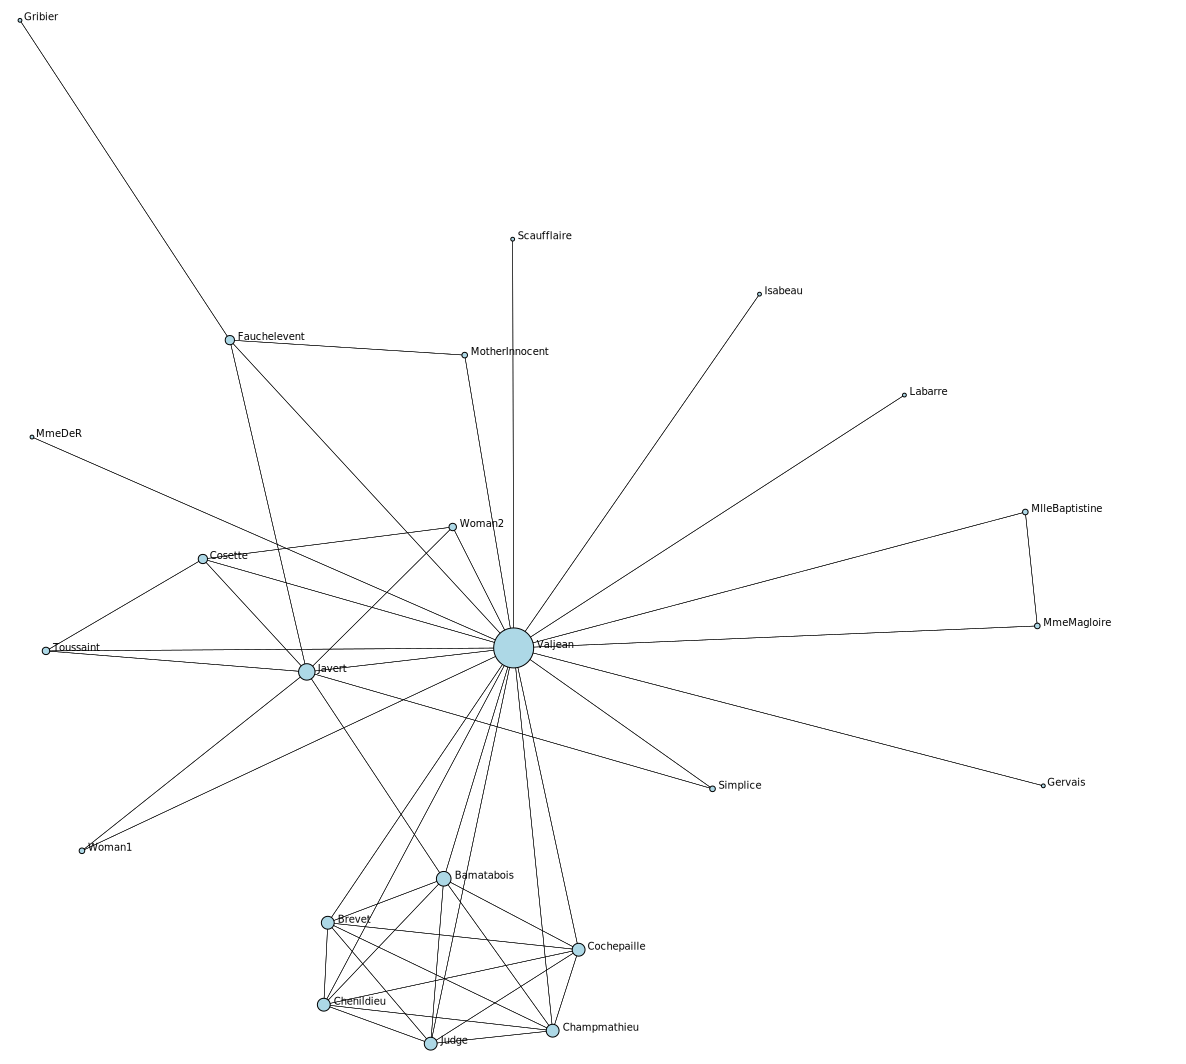

In [57]:
community = communities[1] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

['Favourite' 'Blacheville' 'Zephine' 'Fameuil' 'Listolier' 'Tholomyes'
 'Fantine' 'Perpetue' 'Dahlia' 'Marguerite']


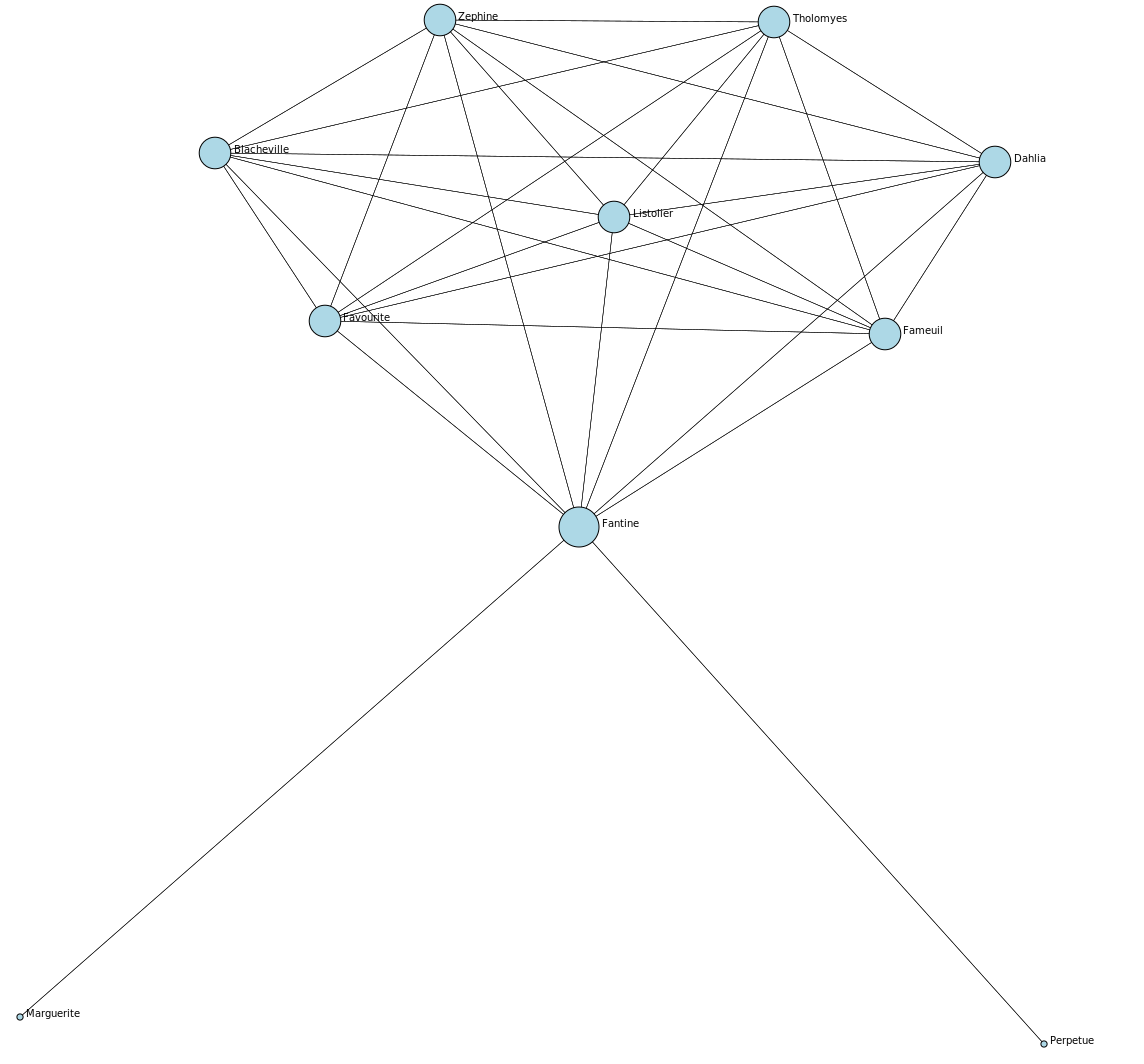

In [58]:
community = communities[2] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

['Eponine' 'Montparnasse' 'Brujon' 'MmeThenardier' 'Anzelma' 'Magnon'
 'Boulatruelle' 'Claquesous' 'Thenardier' 'Gueulemer' 'Babet']


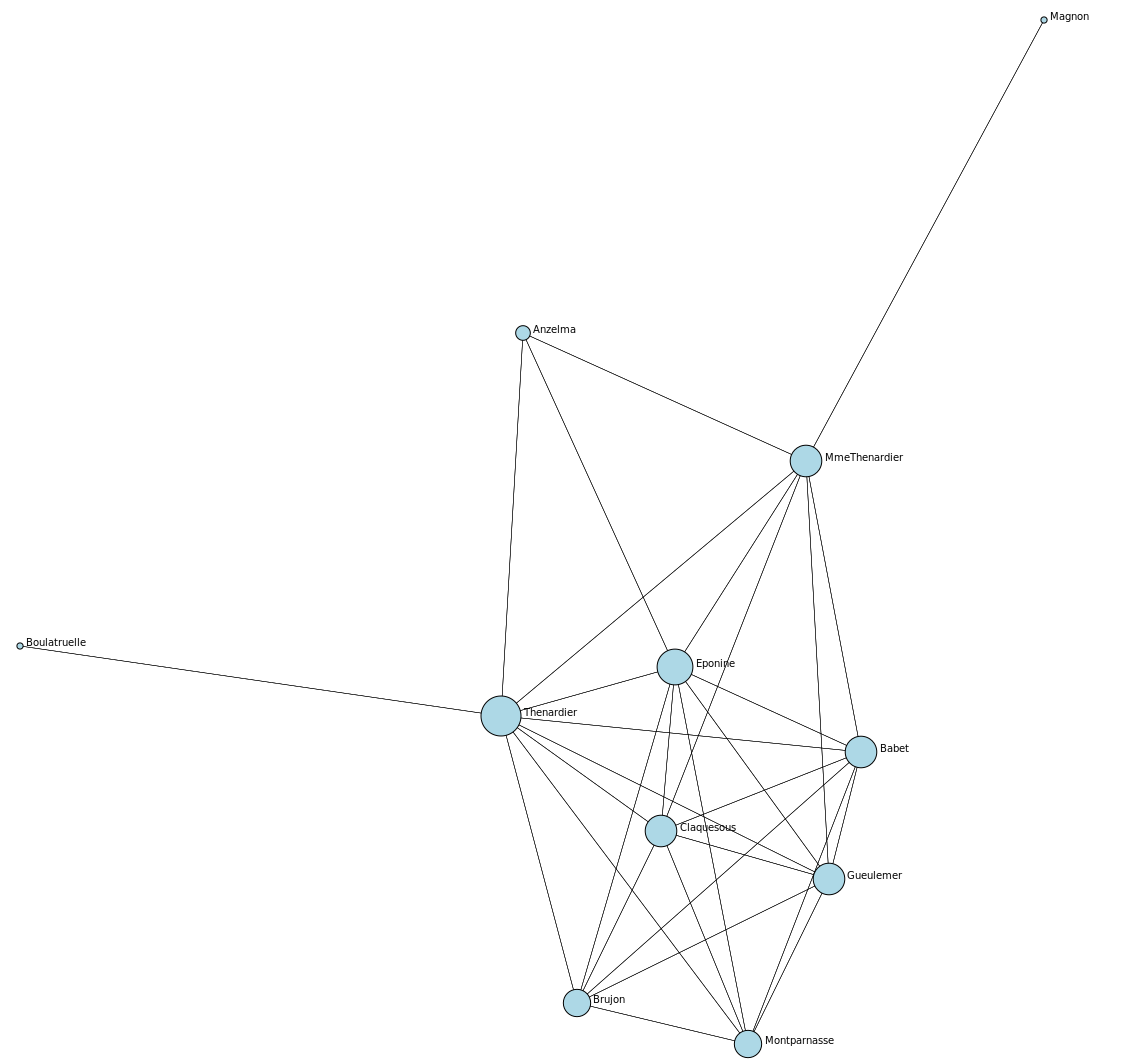

In [59]:
community = communities[3] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

# Girvan-Newman Algorithm

In [60]:
from networkx.algorithms.community import girvan_newman 

In [61]:
communities = girvan_newman(G) 

communities = list(communities) 

In [62]:
len(communities) 

76

In [63]:
communities = communities[9] 

['CountessDeLo' 'Geborand' 'Count' 'MlleBaptistine' 'Myriel' 'Napoleon'
 'Cravatte' 'MmeMagloire' 'OldMan' 'Champtercier']


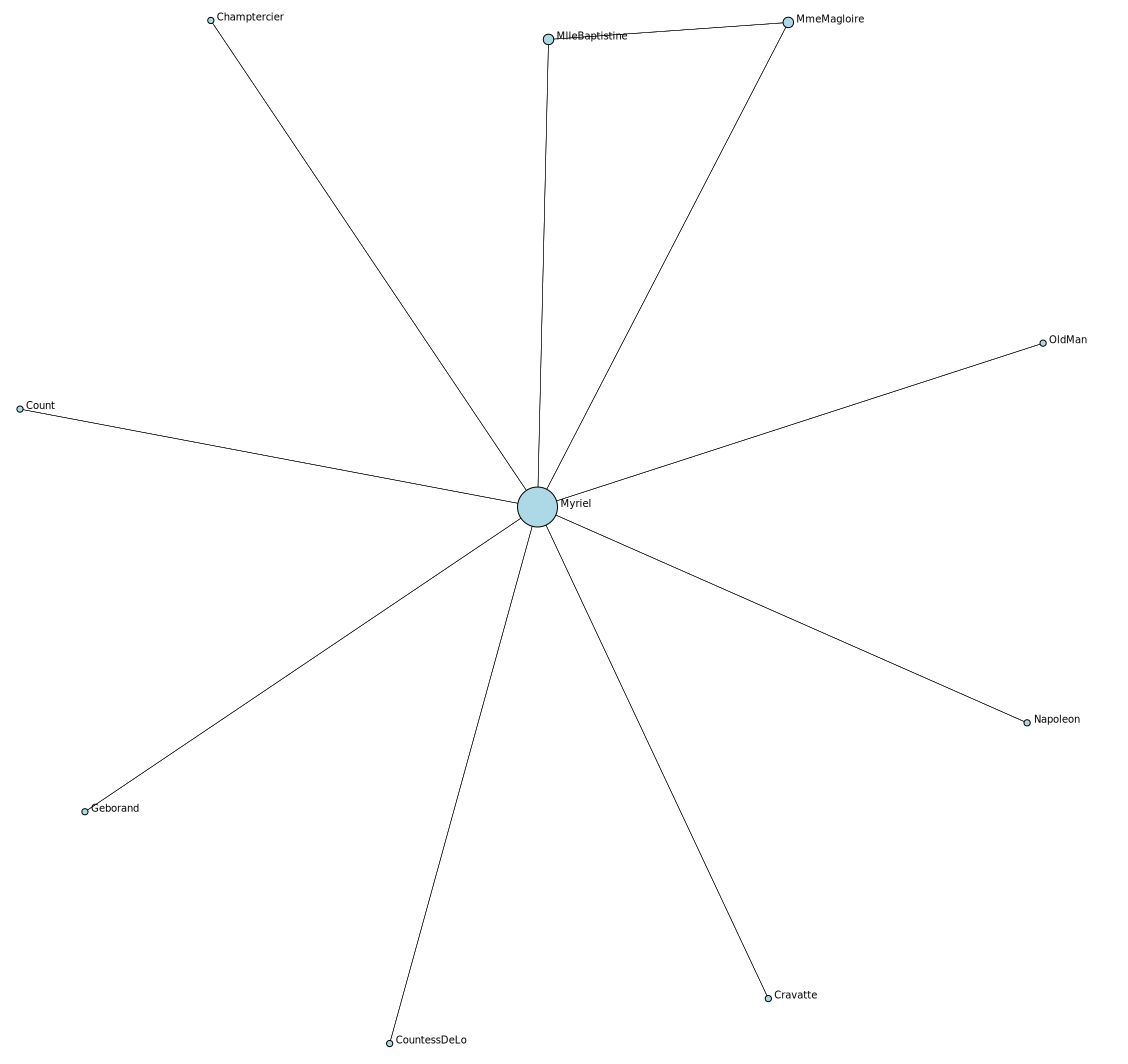

In [64]:
community = communities[0] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

['Scaufflaire' 'Brevet' 'Champmathieu' 'MmeDeR' 'Labarre' 'Bamatabois'
 'Gervais' 'Judge' 'Simplice' 'Woman1' 'Valjean' 'Chenildieu' 'Isabeau'
 'Cochepaille']


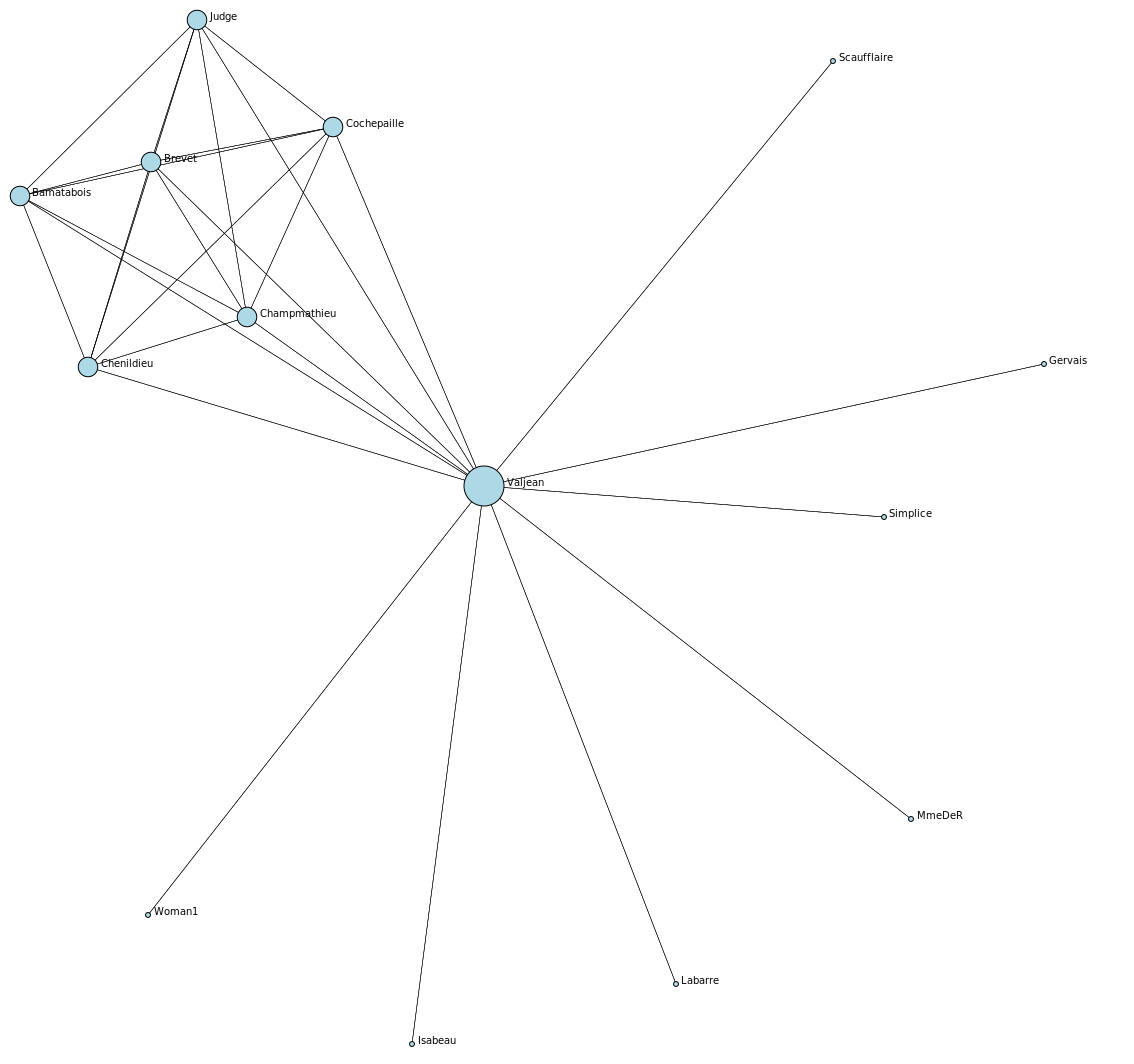

In [65]:
community = communities[1] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

['Favourite' 'Blacheville' 'Zephine' 'Fameuil' 'Listolier' 'Tholomyes'
 'Fantine' 'Perpetue' 'Dahlia' 'Marguerite']


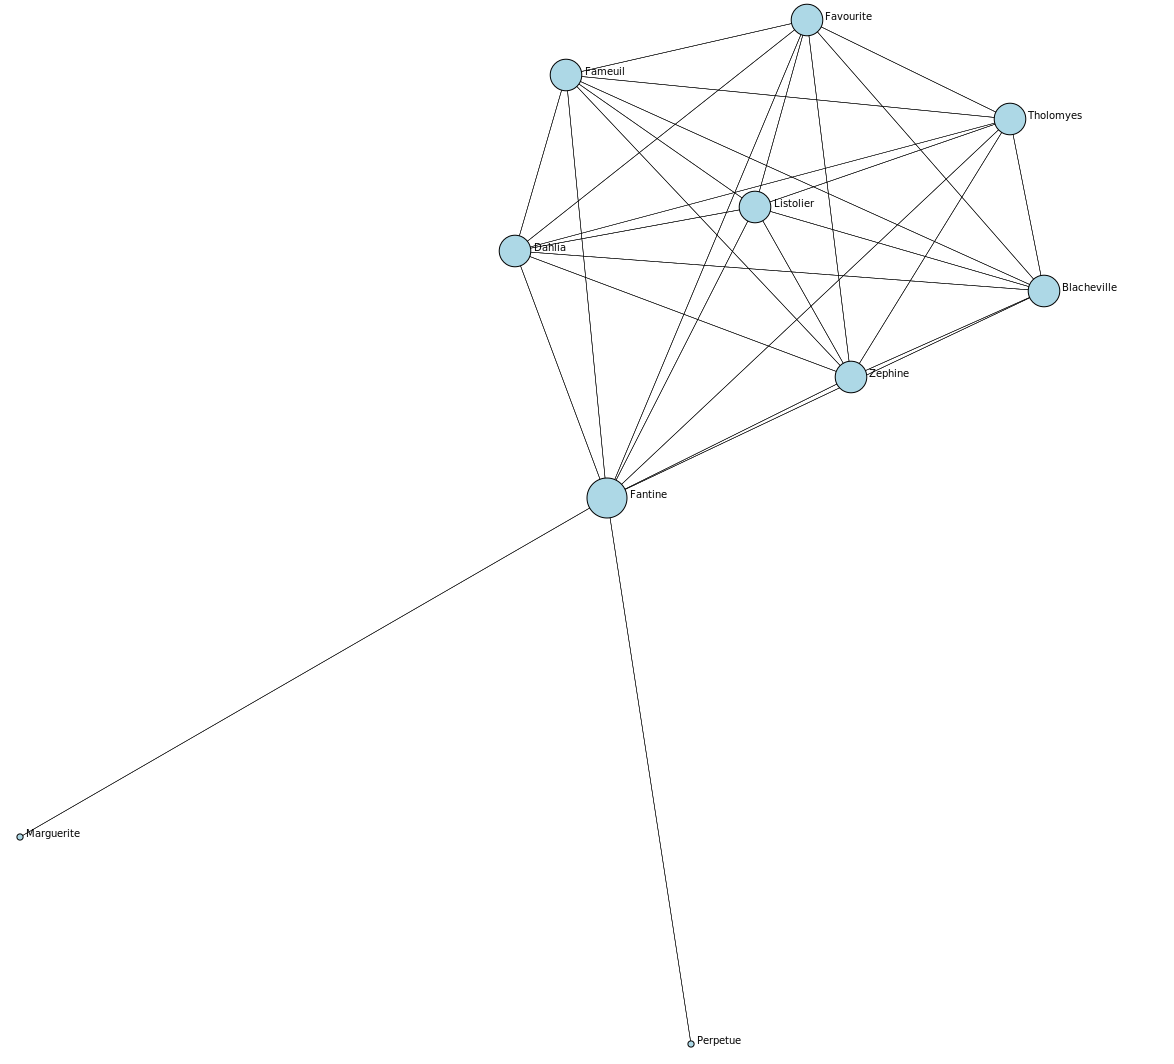

In [66]:
community = communities[2] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

['Eponine' 'Montparnasse' 'Brujon' 'Javert' 'MmeThenardier' 'Babet'
 'Anzelma' 'Claquesous' 'Thenardier' 'Gueulemer' 'Pontmercy']


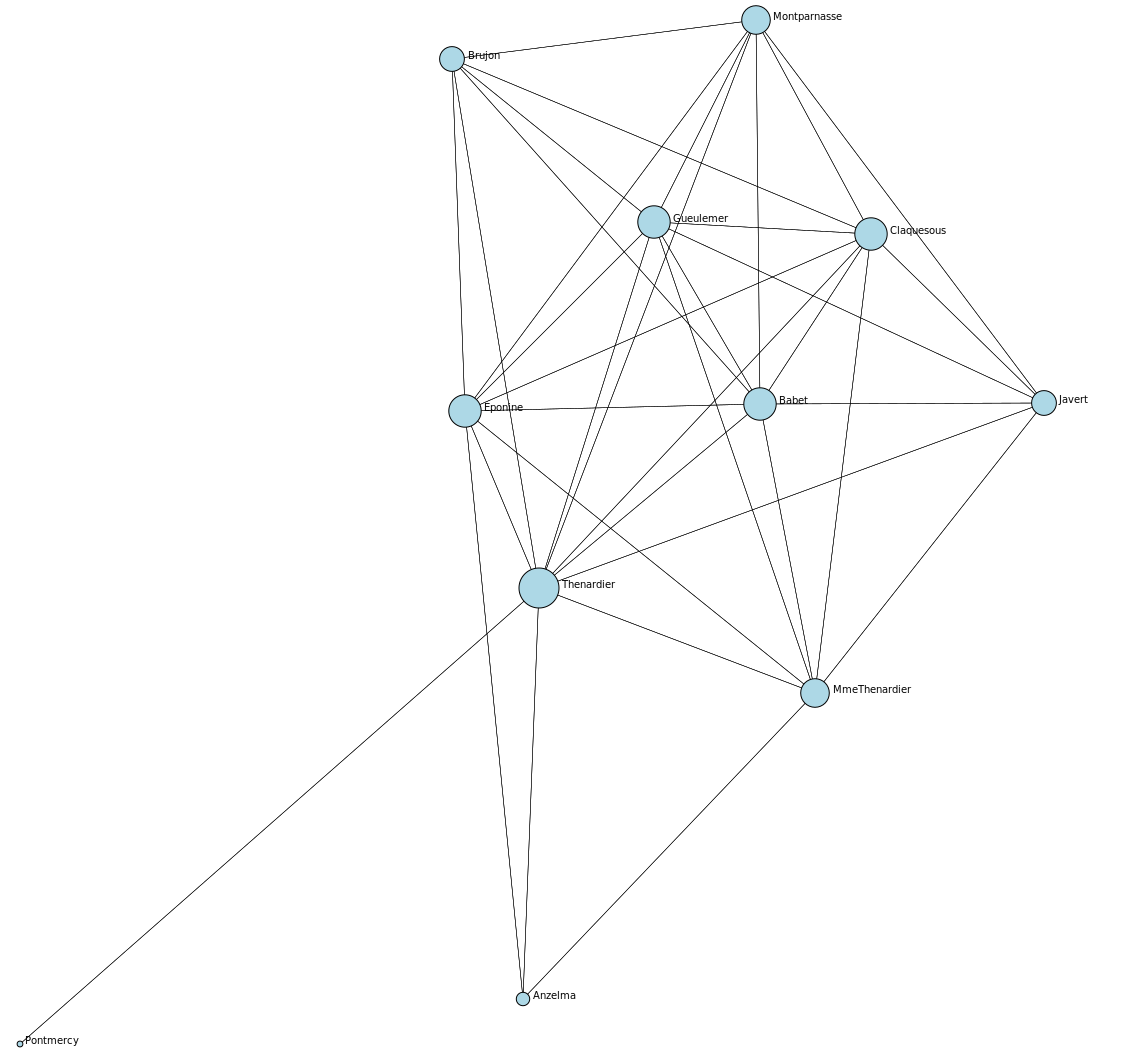

In [67]:
community = communities[3] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

['Gillenormand' 'Cosette' 'MmePontmercy' 'MlleGillenormand'
 'LtGillenormand' 'BaronessT' 'Magnon' 'Woman2' 'Toussaint' 'MlleVaubois']


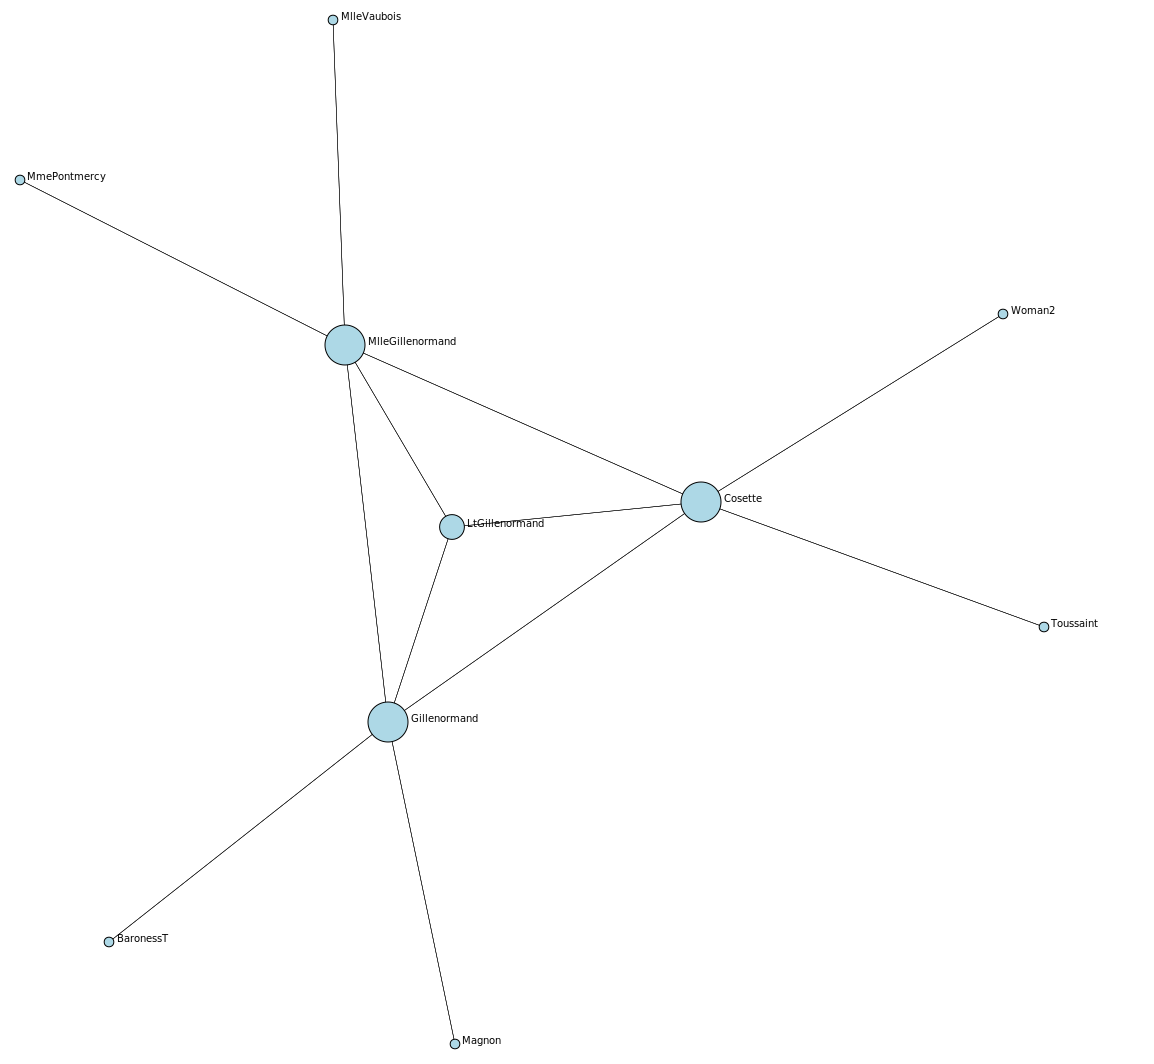

In [68]:
community = communities[4] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 